In [1]:
from datetime import timedelta
import time
starttime = time.perf_counter()

# Analisi del dataset di Train e preprocessing dello stesso.

In [2]:
##Caricamento del Dataset di Train ed esplorazione preliminare
#

import pandas as pd

# Carica i dataset dal repository di Github nei DataFrame
url_train = 'https://raw.githubusercontent.com/francescovissicchio/infrastructure_project_UMG/main/Corona_NLP_train.csv'
df_train = pd.read_csv(url_train, encoding='ISO-8859-1')

# Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati
print('Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati')
print(df_train.head(10))
print()
# Stampa informazioni generali sul DataFrame
print('Stampa informazioni generali sul DataFrame')
print(df_train.info())
print()
# Statistiche descrittive delle colonne numeriche
print('Statistiche descrittive delle colonne numeriche')
print(df_train.describe())
print()
# Controlla se ci sono valori nulli
print('Controlla se ci sono valori nulli')
print(df_train.isnull().sum())
print()
# Visualizza il numero di valori unici in ogni colonna
print('Visualizza il numero di valori unici in ogni colonna')
print(df_train.nunique())

Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati
   UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
3      3802       48754                        NaN  16-03-2020   
4      3803       48755                        NaN  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   
7      3806       48758                    Austria  16-03-2020   
8      3807       48759            Atlanta, GA USA  16-03-2020   
9      3808       48760           BHAVNAGAR,GUJRAT  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family 

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64
Positive              27.752266
Negative              24.095537
Neutral               18.740433
Extremely Positive    16.094468
Extremely Negative    13.317297
Name: Sentiment, dtype: float64


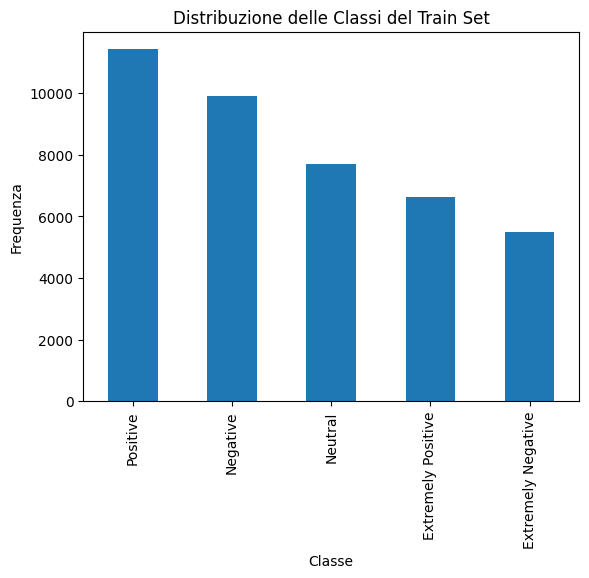

In [3]:
##Analisi di distribuzione delle classi per il Train set
#

import matplotlib.pyplot as plt

sentiment = 'Sentiment'

# Calcola la distribuzione delle classi
class_distribution = df_train[sentiment].value_counts()

# Visualizza la distribuzione delle classi
print(class_distribution)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_train[sentiment].value_counts(normalize=True) * 100

# Visualizza la percentuale della distribuzione delle classi
print(class_distribution_percentage)

# Grafico a barre della distribuzione delle classi
class_distribution.plot(kind='bar')
plt.title('Distribuzione delle Classi del Train Set')
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


https: 23979
coronavirus: 18045
prices: 7901
food: 7053
supermarket: 7018
store: 6816
grocery: 6239
people: 5537
amp: 5197
consumer: 4474


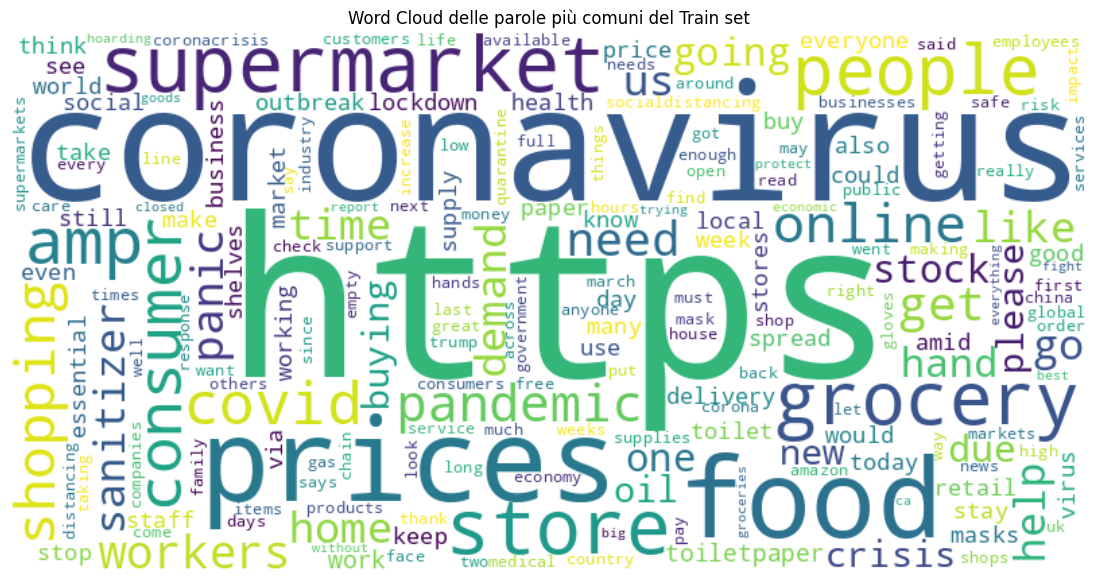

In [4]:
##Identificazione delle 10 parole più comuni per il dataset di Train
#

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Colonna che contiene il testo nel dataset
text_column = 'OriginalTweet'
text_data = df_train[text_column]

# Combina tutto il testo in un'unica stringa
combined_text = " ".join(text for text in text_data)

# Tokenizza il testo
tokens = word_tokenize(combined_text)

# Converti tutte le parole in minuscolo per standardizzare
tokens = [word.lower() for word in tokens if word.isalpha()]

# Rimuovi le stopwords (parole comuni che possono essere escluse)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

# Conta e ottieni le parole più comuni
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Visualizza le 10 parole più comuni
for word, count in most_common_words:
    print(f"{word}: {count}")

#WORD CLOUD (visualizzazione più gradevole)
# Importa la libreria WordCloud
from wordcloud import WordCloud

# Crea un'istanza di WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Genera la word cloud dalle frequenze delle parole
wordcloud.generate_from_frequencies(word_counts)

# Visualizza la word cloud utilizzando matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nasconde gli assi
plt.title('Word Cloud delle parole più comuni del Train set')
plt.show()

In [5]:
##Text cleaning e feature extraction per approccio TF-IDF
#

from sklearn.feature_extraction.text import CountVectorizer
import re
from html import unescape
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# scaricare i componenti necessari di nltk
nltk.download('wordnet')
nltk.download('stopwords')

#Funzione di pulizia del testo
def clean_text(text):
    # Decodifica HTML
    text = unescape(text)

    # Rimuovi URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Rimuovi emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Rimuovi numeri
    text = re.sub(r'\d+', '', text)

    # Rimuovi caratteri speciali e spazi extra
    text = re.sub(r'\s+', ' ', text)  # spazi multipli a spazio singolo
    text = re.sub(r'[^\w\s]', '', text)  # rimuove caratteri speciali, mantenendo solo parole e spazi

    # Normalizzazione del testo: converti tutto in minuscolo
    text = text.lower()

    # Tokenizzazione utilizzando solo parole (rimuove la punteggiatura)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Rimuovi le stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatizzazione
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Riunisci i token puliti in una stringa
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Applica la funzione di pulizia a ciascun elemento
cleaned_text_data = text_data.apply(clean_text)

# Feature Extraction usando CountVectorizer per ottenere la frequenza delle parole
vectorizer = CountVectorizer(max_features=1000) # Considera solo le prime 1000 parole
X = vectorizer.fit_transform(cleaned_text_data)

# Visualizza le feature estratte
print(vectorizer.get_feature_names_out())

# Converti in DataFrame per un'analisi più semplice
X_df_train1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['able' 'absolutely' 'access' 'according' 'account' 'across' 'act'
 'action' 'activity' 'actually' 'add' 'advantage' 'advice' 'affect'
 'affected' 'afford' 'age' 'ago' 'ahead' 'aisle' 'alcohol' 'alert' 'allow'
 'allowed' 'almost' 'along' 'already' 'also' 'always' 'amazing' 'amazon'
 'america' 'american' 'amid' 'amidst' 'among' 'amount' 'amp' 'announced'
 'another' 'answer' 'anxiety' 'anyone' 'anything' 'apart' 'app'
 'appreciate' 'april' 'area' 'arent' 'around' 'article' 'asda' 'ask'
 'asked' 'asking' 'australia' 'available' 'avoid' 'away' 'baby' 'back'
 'bad' 'bag' 'bank' 'bare' 'based' 'basic' 'bc' 'become' 'beginning'
 'behavior' 'behaviour' 'behind' 'believe' 'benefit' 'best' 'better' 'big'
 'biggest' 'bill' 'billion' 'bit' 'blog' 'book' 'borisjohnson' 'bottle'
 'bought' 'box' 'brand' 'bread' 'break' 'breaking' 'bring' 'bulk'
 'business' 'buy' 'buyer' 'buying' 'california' 'call' 'called' 'calling'
 'calm' 'came' 'canada' 'canadian' 'cannot' 'cant' 'canât' 'car' 'card'
 'care' 'car

In [6]:
##Esplorazione preliminare del dataset di Train, analisi della distribuzione delle classi,
# e identificazione 10 parole più comuni per il dataset con testo pulito e
# features estratte
#

# Ottieni una panoramica del DataFrame con il testo pulito
print(cleaned_text_data.head())

# Ottieni informazioni generali sul DataFrame delle feature estratte (BoW)
print(X_df_train1.info())

# Statistiche descrittive delle feature (frequenze delle parole)
print(X_df_train1.describe())

# Analisi della distribuzione delle classi
class_counts = df_train[sentiment].value_counts()
print(class_counts)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_train[sentiment].value_counts(normalize=True) * 100
print(class_distribution_percentage)

# Somma le frequenze di ogni termine nel DataFrame delle feature
word_frequencies = X_df_train1.sum(axis=0).sort_values(ascending=False)

# Ottieni le 10 parole più comuni
top_words = word_frequencies.head(10)
print(top_words)


0                         menyrbie phil_gahan chrisitv
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock one empty please dont panic enough ...
4    ready go supermarket covid outbreak im paranoi...
Name: OriginalTweet, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Columns: 1000 entries, able to youâre
dtypes: int64(1000)
memory usage: 314.0 MB
None
               able    absolutely        access     according       account  \
count  41157.000000  41157.000000  41157.000000  41157.000000  41157.000000   
mean       0.009695      0.003110      0.007654      0.004422      0.003402   
std        0.101156      0.057401      0.090970      0.066352      0.062647   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0

count    41157.000000
mean       132.095804
std         47.888286
min          0.000000
25%         95.000000
50%        138.000000
75%        171.000000
max        263.000000
Name: tweet_length, dtype: float64
count    41157.000000
mean        17.997182
std          6.548999
min          0.000000
25%         13.000000
50%         19.000000
75%         23.000000
max         41.000000
Name: word_count, dtype: float64


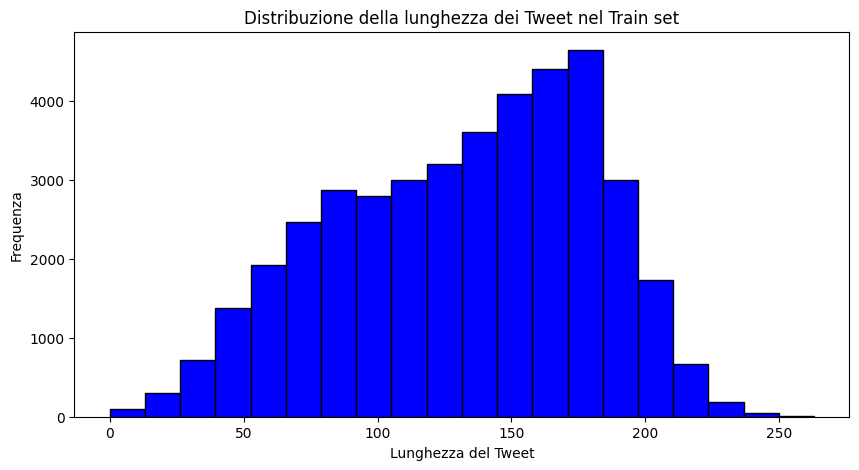

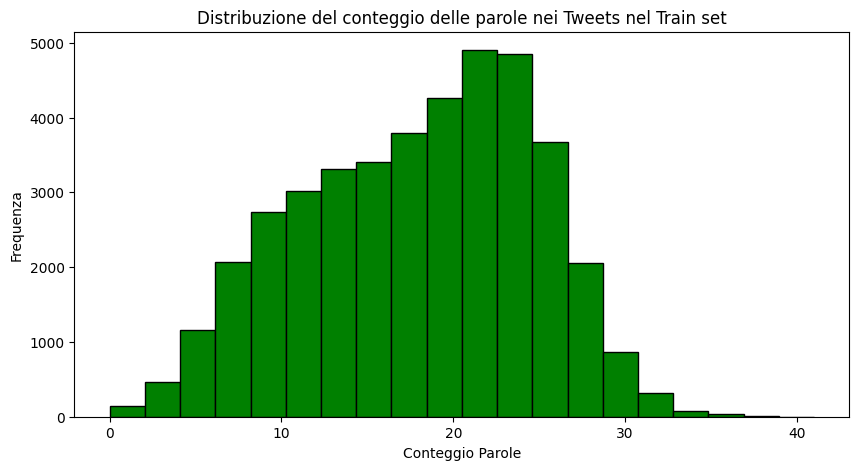

Bigrammi più comuni:
(('grocery', 'store'), 5067)
(('coronavirus', 'covid'), 2062)
(('covid', 'coronavirus'), 1760)
(('hand', 'sanitizer'), 1513)
(('online', 'shopping'), 1336)
(('toilet', 'paper'), 1230)
(('covid', 'pandemic'), 1077)
(('panic', 'buying'), 1055)
(('oil', 'price'), 1040)
(('coronavirus', 'pandemic'), 760)

Trigrammi più comuni:
(('grocery', 'store', 'worker'), 488)
(('go', 'grocery', 'store'), 302)
(('grocery', 'store', 'employee'), 278)
(('going', 'grocery', 'store'), 206)
(('local', 'grocery', 'store'), 174)
(('stop', 'panic', 'buying'), 151)
(('went', 'grocery', 'store'), 148)
(('work', 'grocery', 'store'), 127)
(('coronavirus', 'covid', 'covid'), 123)
(('food', 'supply', 'chain'), 120)


In [7]:
##Analisi statistica dei Tweets (word level) per il dataset di Train
#
import numpy as np
from nltk import bigrams, trigrams, FreqDist

# 'cleaned_text_data' è una pandas Series contenente il testo dei Tweet.
# Creiamo un nuovo DataFrame per le nostre analisi
analysis_df = pd.DataFrame()
analysis_df['tweet_text'] = cleaned_text_data
analysis_df['tweet_length'] = cleaned_text_data.apply(len)
analysis_df['word_count'] = cleaned_text_data.apply(lambda x: len(x.split()))

# Visualizza le statistiche descrittive per la lunghezza dei tweet e il conteggio delle parole
print(analysis_df['tweet_length'].describe())
print(analysis_df['word_count'].describe())

# Istogramma della lunghezza dei tweet
plt.figure(figsize=(10, 5))
plt.hist(analysis_df['tweet_length'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuzione della lunghezza dei Tweet nel Train set')
plt.xlabel('Lunghezza del Tweet')
plt.ylabel('Frequenza')
plt.show()

# Istogramma del conteggio delle parole
plt.figure(figsize=(10, 5))
plt.hist(analysis_df['word_count'], bins=20, color='green', edgecolor='black')
plt.title('Distribuzione del conteggio delle parole nei Tweets nel Train set')
plt.xlabel('Conteggio Parole')
plt.ylabel('Frequenza')
plt.show()

# Analisi di bigrammi e trigrammi (le 10 combinazioni più comuni)
# Unisco tutti i tweet in una stringa e tokenizzo
all_words = ' '.join(cleaned_text_data).split()

# Calcola bigrammi e trigrammi
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Calcola le frequenze
bi_gram_freq = FreqDist(bi_grams).most_common(10)
tri_gram_freq = FreqDist(tri_grams).most_common(10)

print("Bigrammi più comuni:")
for item in bi_gram_freq:
    print(item)

print("\nTrigrammi più comuni:")
for item in tri_gram_freq:
    print(item)

# Analisi del dataset di Test e preprocessing dello stesso.

In [8]:
##Caricamento del Dataset di Test ed esplorazione preliminare
#

# Carica i dataset dal repository di Github nei DataFrame
url_test = 'https://raw.githubusercontent.com/francescovissicchio/infrastructure_project_UMG/main/Corona_NLP_test.csv'
df_test = pd.read_csv(url_test, encoding='ISO-8859-1')

# Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati
print('Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati')
print(df_test.head(10))
print()
# Stampa informazioni generali sul DataFrame
print('Stampa informazioni generali sul DataFrame')
print(df_test.info())
print()
# Statistiche descrittive delle colonne numeriche
print('Statistiche descrittive delle colonne numeriche')
print(df_test.describe())
print()
# Controlla se ci sono valori nulli
print('Controlla se ci sono valori nulli')
print(df_test.isnull().sum())
print()
# Visualizza il numero di valori unici in ogni colonna
print('Visualizza il numero di valori unici in ogni colonna')
print(df_test.nunique())

Visualizza le prime 10 righe del DataFrame per confermare il caricamento dei dati
   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   
5         6       44958          Los Angeles  03-03-2020   
6         7       44959                  NaN  03-03-2020   
7         8       44960  Geneva, Switzerland  03-03-2020   
8         9       44961                  NaN  04-03-2020   
9        10       44962      Dublin, Ireland  04-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect 

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64
Negative              27.409163
Positive              24.934176
Neutral               16.298052
Extremely Positive    15.771459
Extremely Negative    15.587151
Name: Sentiment, dtype: float64


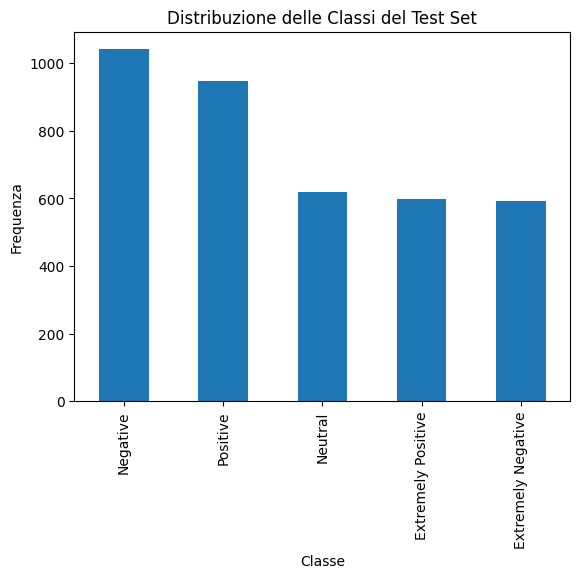

In [9]:
##Analisi di distribuzione delle classi per il Test set
#

sentiment = 'Sentiment'

# Calcola la distribuzione delle classi
class_distribution = df_test[sentiment].value_counts()

# Visualizza la distribuzione delle classi
print(class_distribution)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_test[sentiment].value_counts(normalize=True) * 100

# Visualizza la percentuale della distribuzione delle classi
print(class_distribution_percentage)

# Grafico a barre della distribuzione delle classi
class_distribution.plot(kind='bar')
plt.title('Distribuzione delle Classi del Test Set')
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.show()

https: 1824
coronavirus: 1510
food: 1331
store: 1012
grocery: 816
people: 783
stock: 780
amp: 610
shopping: 522
supermarket: 515


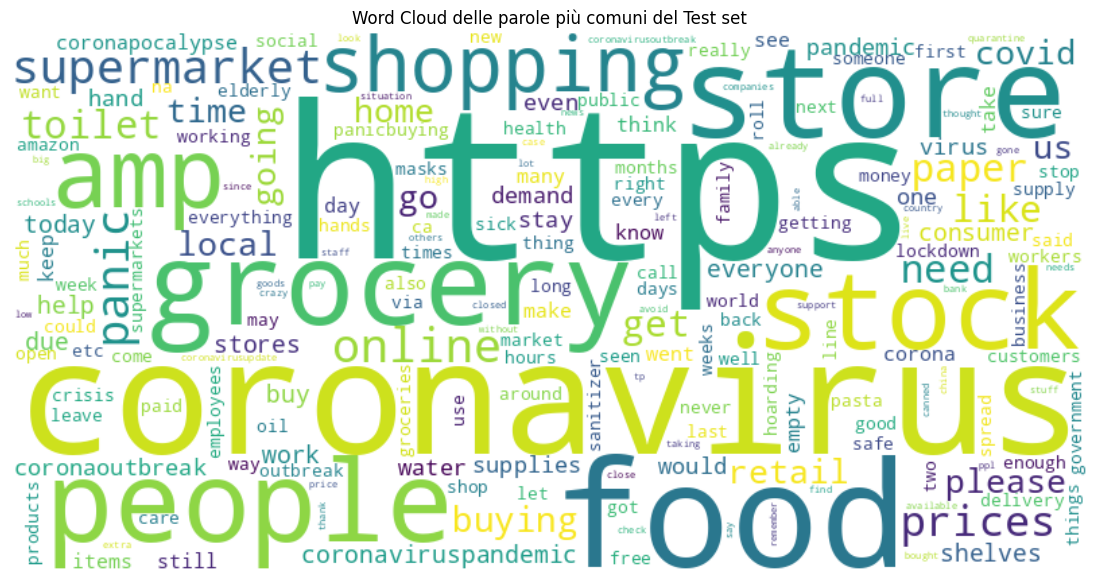

In [10]:
##Identificazione delle 10 parole più comuni per il dataset di Test
#

# Colonna che contiene il testo nel dataset
text_column = 'OriginalTweet'
text_data_test = df_test[text_column]

# Combina tutto il testo in un'unica stringa
combined_text = " ".join(text for text in text_data_test)

# Tokenizza il testo
tokens = word_tokenize(combined_text)

# Converti tutte le parole in minuscolo per standardizzare
tokens = [word.lower() for word in tokens if word.isalpha()]

# Rimuovi le stopwords (parole comuni che possono essere escluse)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

# Conta e ottieni le parole più comuni
word_counts = Counter(tokens)
most_common_words = word_counts.most_common(10)

# Visualizza le 10 parole più comuni
for word, count in most_common_words:
    print(f"{word}: {count}")

#WORD CLOUD (visualizzazione più gradevole)
# Crea un'istanza di WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Genera la word cloud dalle frequenze delle parole
wordcloud.generate_from_frequencies(word_counts)

# Visualizza la word cloud utilizzando matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nasconde gli assi
plt.title('Word Cloud delle parole più comuni del Test set')
plt.show()

In [11]:
##Text cleaning e feature extraction per il Test set
#

# Applica la funzione di pulizia a ciascun elemento
cleaned_text_data_test = text_data_test.apply(clean_text)

# Bisogna utilizzare il vectorizer già adattato dai dati di training,
# perciò ci si assicura che il vectorizer sia quello adattato sopra con i dati di training
X = vectorizer.transform(cleaned_text_data_test)

# Converti in DataFrame per un'analisi più semplice
X_df_test1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [12]:
##Esplorazione preliminare del dataset di Test, analisi della distribuzione delle classi,
# e identificazione 10 parole più comuni per il dataset con testo pulito e
# features estratte
#

# Ottieni una panoramica del DataFrame con il testo pulito
print(cleaned_text_data_test.head())

# Ottieni informazioni generali sul DataFrame delle feature estratte (BoW)
print(X_df_test1.info())

# Statistiche descrittive delle feature (frequenze delle parole)
print(X_df_test1.describe())

# Analisi della distribuzione delle classi
class_counts = df_test[sentiment].value_counts()
print(class_counts)

# Calcola la percentuale per ciascuna classe
class_distribution_percentage = df_test[sentiment].value_counts(normalize=True) * 100
print(class_distribution_percentage)

# Somma le frequenze di ogni termine nel DataFrame delle feature
word_frequencies = X_df_test1.sum(axis=0).sort_values(ascending=False)

# Ottieni le 10 parole più comuni
top_words = word_frequencies.head(10)
print(top_words)

0    trending new yorkers encounter empty supermark...
1    couldnt find hand sanitizer fred meyer turned ...
2                   find protect loved one coronavirus
3    panic buying hit newyork city anxious shopper ...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: OriginalTweet, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Columns: 1000 entries, able to youâre
dtypes: int64(1000)
memory usage: 29.0 MB
None
              able   absolutely       access    according      account  \
count  3798.000000  3798.000000  3798.000000  3798.000000  3798.000000   
mean      0.013955     0.003423     0.005529     0.003686     0.002633   
std       0.117318     0.058413     0.074163     0.060610     0.051252   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.0

count    3798.000000
mean      136.982359
std        46.135394
min         9.000000
25%       103.000000
50%       144.000000
75%       174.000000
max       256.000000
Name: tweet_length, dtype: float64
count    3798.000000
mean       19.119010
std         6.611221
min         2.000000
25%        14.000000
50%        20.000000
75%        24.000000
max        38.000000
Name: word_count, dtype: float64


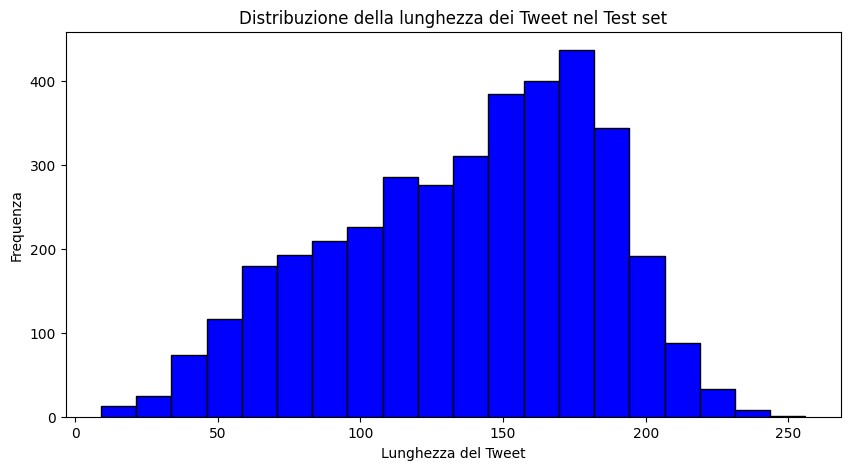

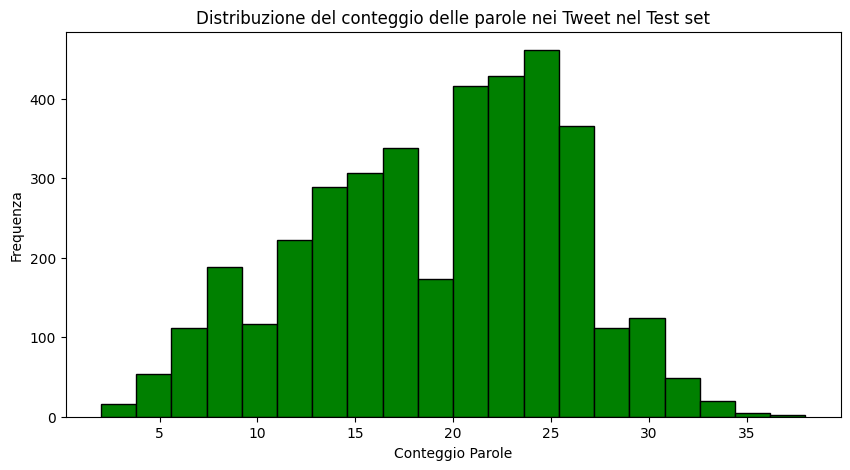

Bigrammi più comuni:
(('grocery', 'store'), 716)
(('toilet', 'paper'), 312)
(('online', 'shopping'), 224)
(('stock', 'food'), 220)
(('panic', 'buying'), 163)
(('coronavirus', 'covid'), 129)
(('covid_', 'coronavirus'), 101)
(('coronavirus', 'covid_'), 95)
(('retail', 'store'), 95)
(('covid', 'coronavirus'), 92)

Trigrammi più comuni:
(('local', 'grocery', 'store'), 59)
(('went', 'grocery', 'store'), 38)
(('go', 'grocery', 'store'), 32)
(('paid', 'sick', 'leave'), 30)
(('food', 'toilet', 'paper'), 29)
(('local', 'food', 'bank'), 26)
(('grocery', 'store', 'today'), 24)
(('grocery', 'store', 'covid_'), 23)
(('grocery', 'store', 'shelf'), 22)
(('buying', 'toilet', 'paper'), 19)


In [13]:
##Analisi statistica dei Tweets (word level) per il dataset di Test
#

# 'cleaned_text_data_test' è una pandas Series contenente il testo dei Tweet.
# Creiamo un nuovo DataFrame per le nostre analisi
analysis_df_test = pd.DataFrame()
analysis_df_test['tweet_text'] = cleaned_text_data_test
analysis_df_test['tweet_length'] = cleaned_text_data_test.apply(len)
analysis_df_test['word_count'] = cleaned_text_data_test.apply(lambda x: len(x.split()))

# Visualizza le statistiche descrittive per la lunghezza dei tweet e il conteggio delle parole
print(analysis_df_test['tweet_length'].describe())
print(analysis_df_test['word_count'].describe())

# Istogramma della lunghezza dei tweet
plt.figure(figsize=(10, 5))
plt.hist(analysis_df_test['tweet_length'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuzione della lunghezza dei Tweet nel Test set')
plt.xlabel('Lunghezza del Tweet')
plt.ylabel('Frequenza')
plt.show()

# Istogramma del conteggio delle parole
plt.figure(figsize=(10, 5))
plt.hist(analysis_df_test['word_count'], bins=20, color='green', edgecolor='black')
plt.title('Distribuzione del conteggio delle parole nei Tweet nel Test set')
plt.xlabel('Conteggio Parole')
plt.ylabel('Frequenza')
plt.show()

# Analisi di bigrammi e trigrammi (le 10 combinazioni più comuni)
# Unisco tutti i tweet in una stringa e tokenizzo
all_words = ' '.join(cleaned_text_data_test).split()

# Calcola bigrammi e trigrammi
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Calcola le frequenze
bi_gram_freq = FreqDist(bi_grams).most_common(10)
tri_gram_freq = FreqDist(tri_grams).most_common(10)

print("Bigrammi più comuni:")
for item in bi_gram_freq:
    print(item)

print("\nTrigrammi più comuni:")
for item in tri_gram_freq:
    print(item)

# Modelli di Machine Learning per la classificazione binaria del Sentiment dei Tweets.

In [14]:
print(X_df_train1.columns)
print(X_df_test1.columns)

# Verifica che entrambi i DataFrame abbiano le stesse colonne nell'ordine esatto
assert list(X_df_train1.columns) == list(X_df_test1.columns), "Columns do not match!"

Index(['able', 'absolutely', 'access', 'according', 'account', 'across', 'act',
       'action', 'activity', 'actually',
       ...
       'worth', 'would', 'wrong', 'year', 'yes', 'yesterday', 'yet', 'youre',
       'youtube', 'youâre'],
      dtype='object', length=1000)
Index(['able', 'absolutely', 'access', 'according', 'account', 'across', 'act',
       'action', 'activity', 'actually',
       ...
       'worth', 'would', 'wrong', 'year', 'yes', 'yesterday', 'yet', 'youre',
       'youtube', 'youâre'],
      dtype='object', length=1000)


Logistic Regression Accuracy: 0.7857816923560869
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      1633
           1       0.77      0.80      0.78      1546

    accuracy                           0.79      3179
   macro avg       0.79      0.79      0.79      3179
weighted avg       0.79      0.79      0.79      3179

Decision Tree Accuracy: 0.5847750865051903
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.26      0.39      1633
           1       0.54      0.93      0.68      1546

    accuracy                           0.58      3179
   macro avg       0.67      0.59      0.54      3179
weighted avg       0.67      0.58      0.53      3179

Random Forest Accuracy: 0.6608996539792388
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.41   

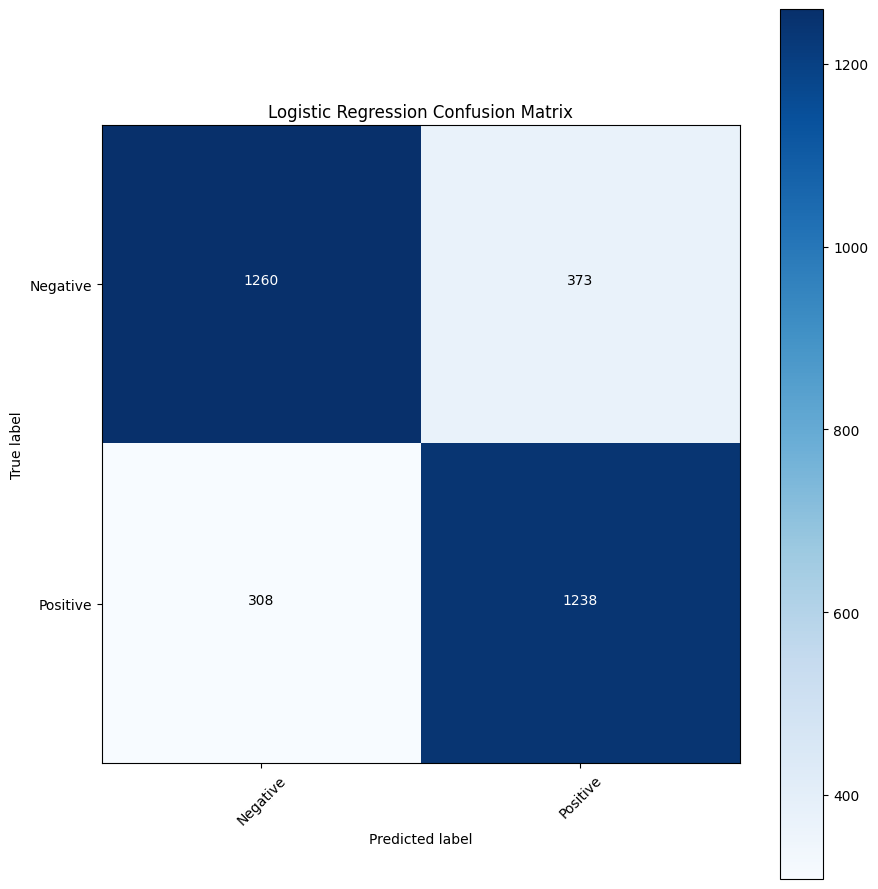

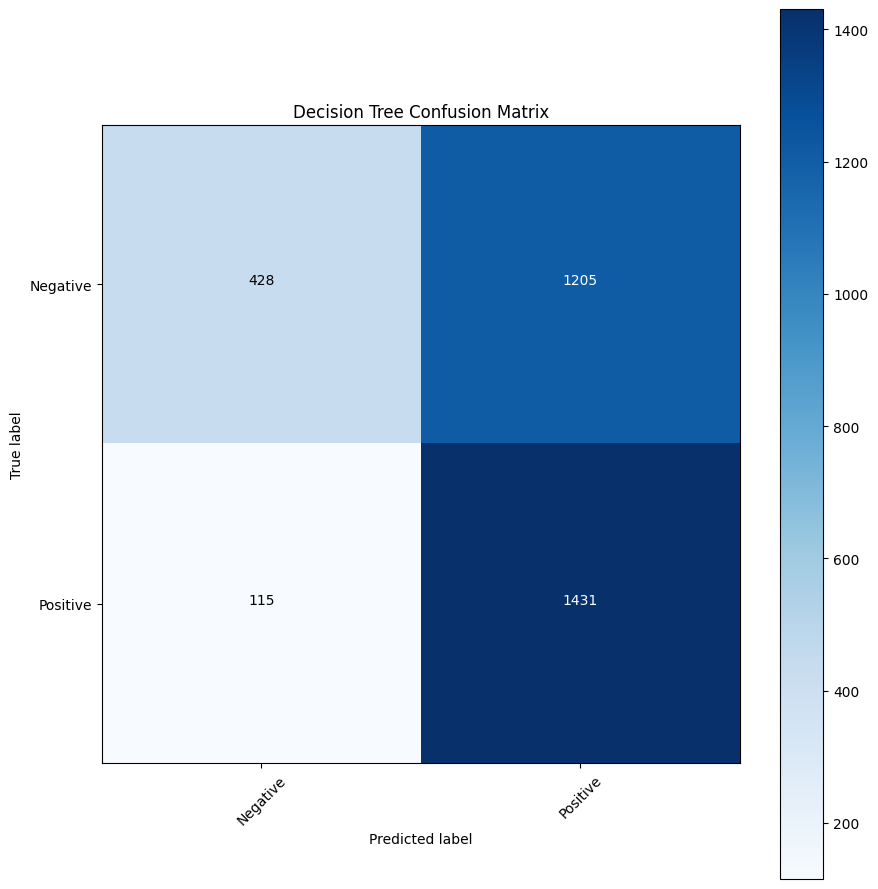

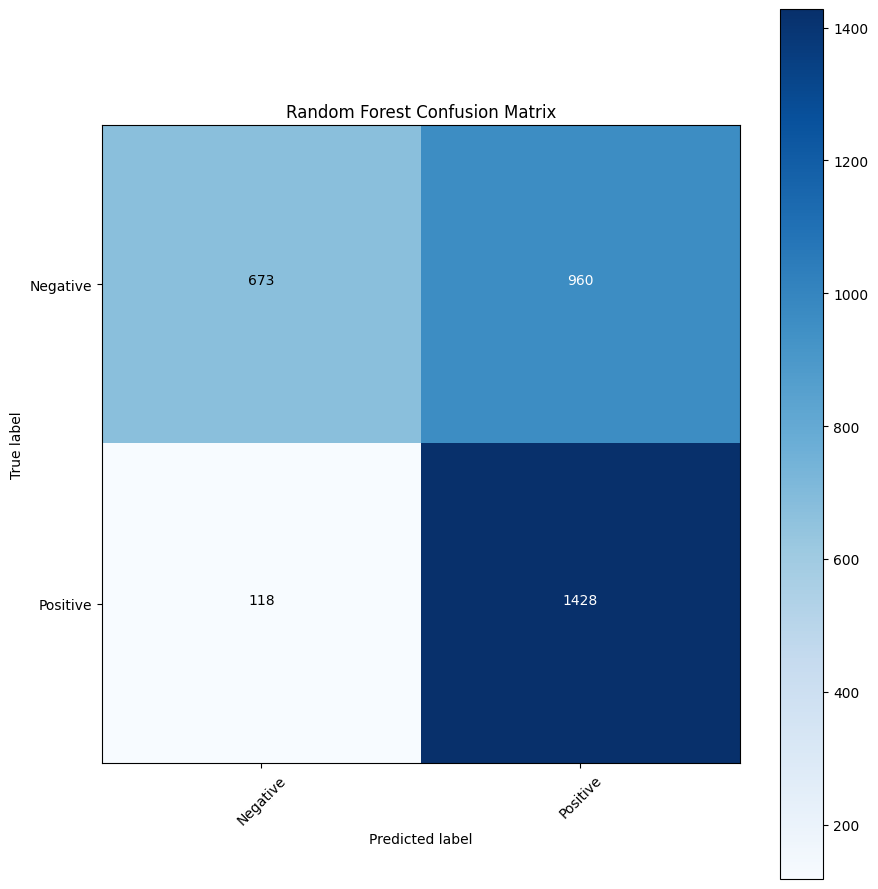

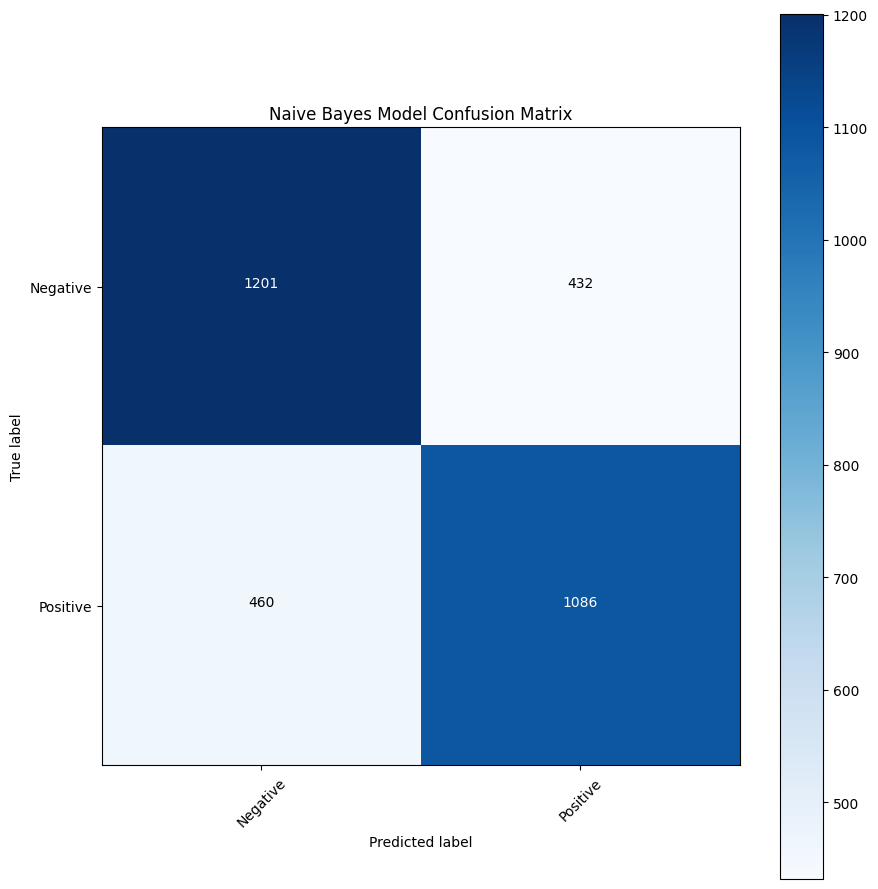

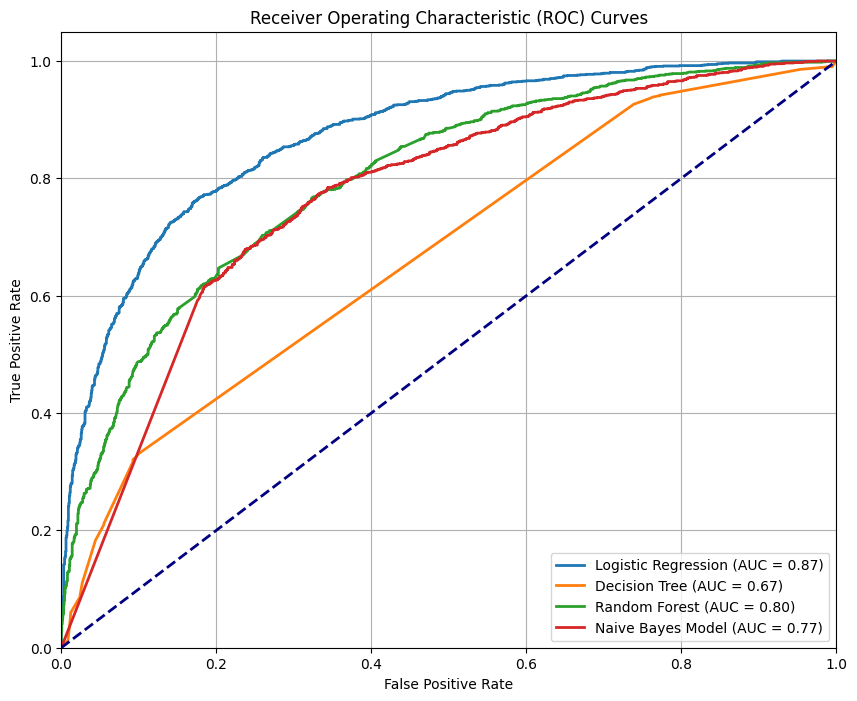

In [15]:
##Modelli Machine Learning per la classificazione binaria del Sentiment
#

import itertools
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


# 'Sentiment' è la colonna da dicotomizzare.
# Scartiamo i Tweet neutri dal dataset di addestramento e test
binary_train_df = df_train[df_train[sentiment] != 'Neutral']
binary_test_df = df_test[df_test[sentiment] != 'Neutral']

# Definiamo le nostre feature (X) e target (y) per l'addestramento
X_train = X_df_train1.loc[binary_train_df.index]
y_train = binary_train_df[sentiment].apply(lambda x: 1 if x == 'Positive' or x == 'Extremely Positive' else 0)

# Definiamo le nostre feature (X) e target (y) per il test
X_test = X_df_test1.loc[binary_test_df.index]
y_test = binary_test_df[sentiment].apply(lambda x: 1 if x == 'Positive' or x == 'Extremely Positive' else 0)

# Inizializzazione dei modelli di machine learning con parametri ottimizzati
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
naive_bayes_model = GaussianNB()

# Creazione di un dizionario per i modelli
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Naive Bayes Model': naive_bayes_model
}


# Addestramento e valutazione dei modelli con aggiunta di precision, recall e F1-score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    # Calcolo della precision, recall e F1-score
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))

# Funzione per plottare la matrice di confusione
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot delle matrici di confusione per ogni modello
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(9, 9))
    plot_confusion_matrix(cm, classes=['Negative', 'Positive'], title=f'{name} Confusion Matrix')
    plt.show()

# Visualizzazione delle Curve ROC per tutti i modelli
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


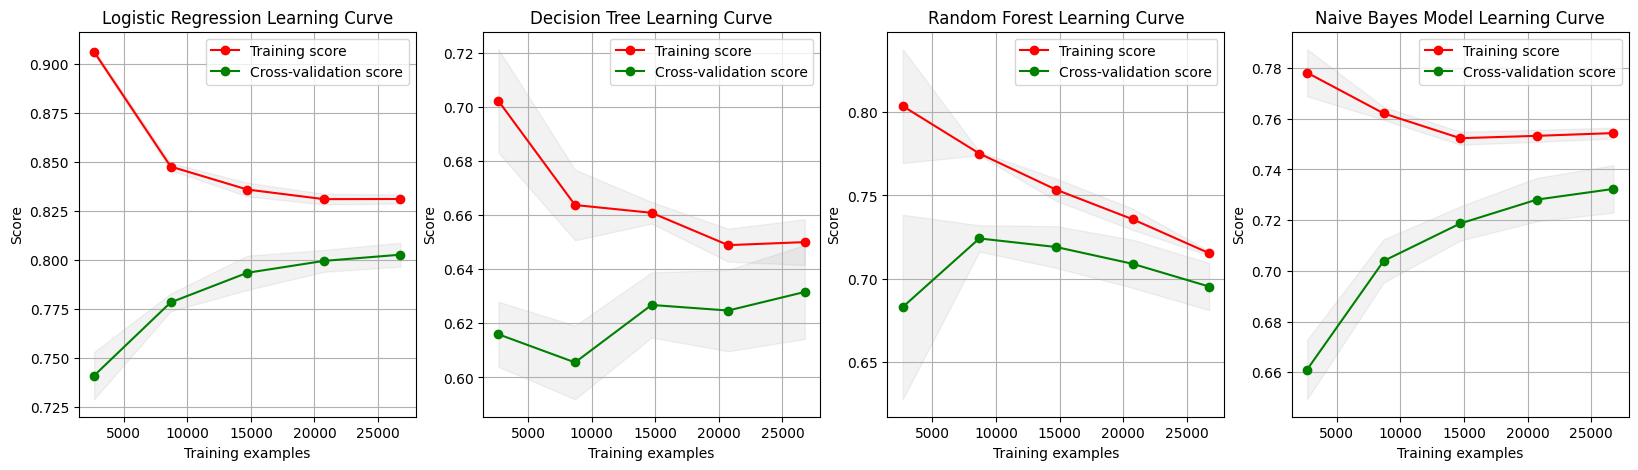

In [16]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, color="gray", alpha=0.1)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, color="gray", alpha=0.1)
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

fig, axes = plt.subplots(1, len(models), figsize=(20, 5))

for i, (name, model) in enumerate(models.items()):
    plot_learning_curve(model, f'{name} Learning Curve', X_train, y_train, axes=axes[i], cv=5, n_jobs=-1)

plt.show()

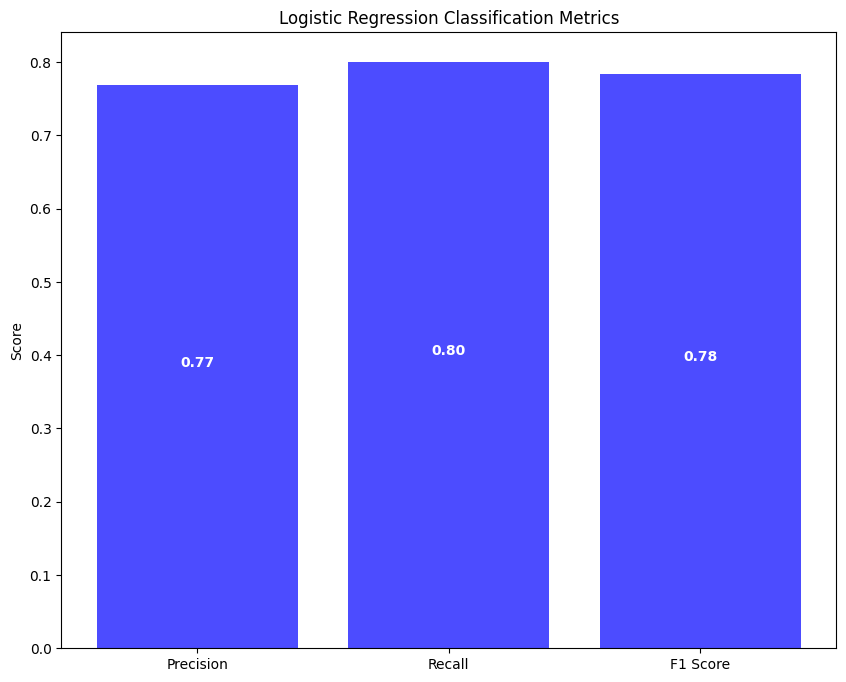

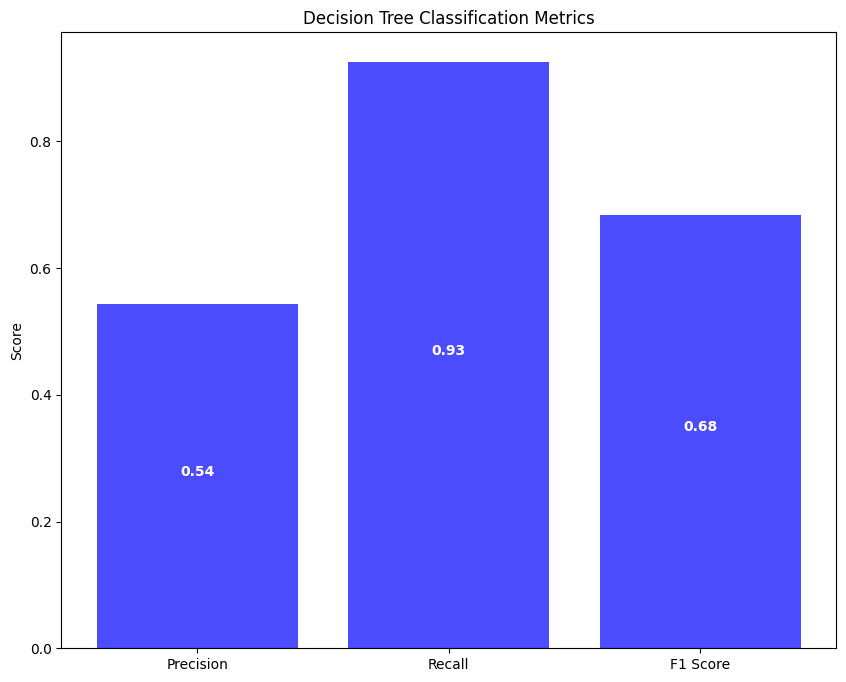

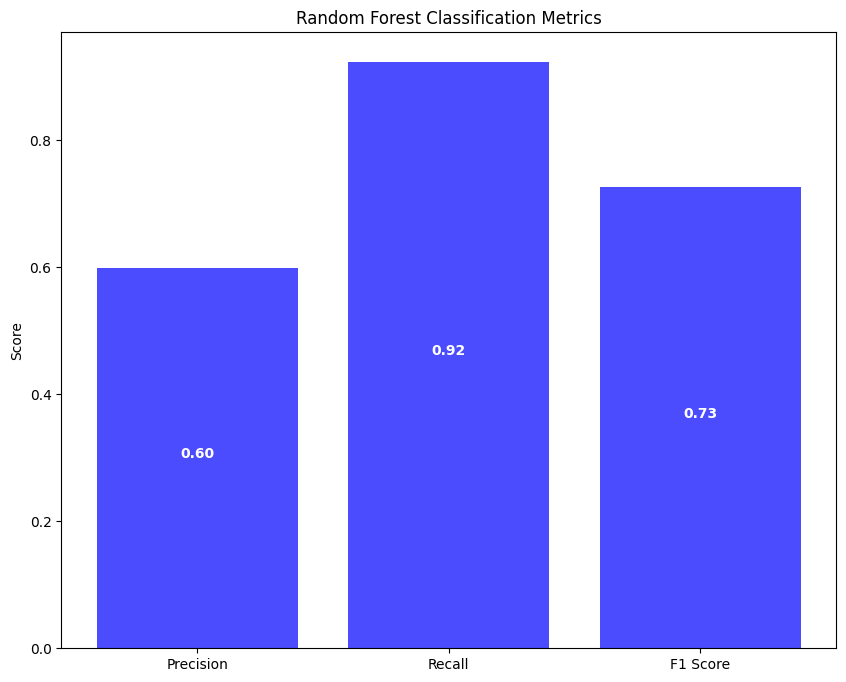

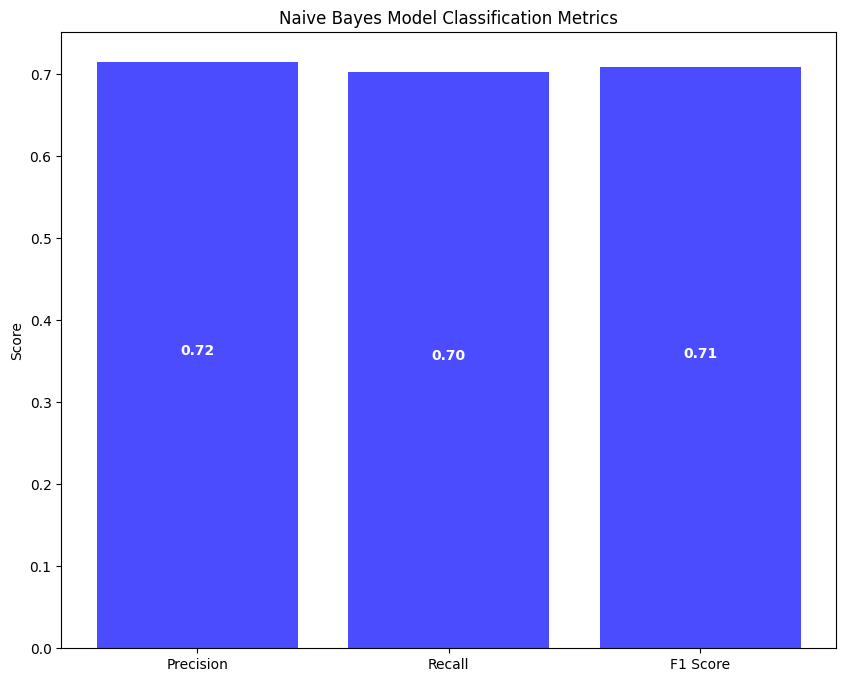

In [17]:
##Grafico dei punteggi di training e validazione incrociata
#

from sklearn.metrics import classification_report, precision_recall_fscore_support
import numpy as np

for name, model in models.items():
    # Calcolo delle previsioni per il modello corrente
    y_pred = model.predict(X_test)

    # Calcolo delle metriche per il modello corrente
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    # Bar chart per precision, recall e F1-score per il modello corrente
    metrics = [precision, recall, f1_score]
    metric_names = ['Precision', 'Recall', 'F1 Score']
    y_pos = np.arange(len(metrics))

    plt.figure(figsize=(10, 8))
    plt.bar(y_pos, metrics, alpha=0.7, color='blue')
    plt.xticks(y_pos, metric_names)
    plt.ylabel('Score')
    plt.title(f'{name} Classification Metrics')

    for i in range(len(metric_names)):
        plt.text(i, metrics[i] / 2, f'{metrics[i]:.2f}', ha='center', color='white', fontweight='bold')

    plt.show()

# Modelli Deep Learning

**Approccio TF-IDF**

Epoch 1/100
419/419 [==============================] - 3s 5ms/step - loss: 0.5935 - accuracy: 0.6685 - val_loss: 0.4510 - val_accuracy: 0.7959
Epoch 2/100
419/419 [==============================] - 2s 4ms/step - loss: 0.4634 - accuracy: 0.7882 - val_loss: 0.4165 - val_accuracy: 0.8082
Epoch 3/100
419/419 [==============================] - 2s 4ms/step - loss: 0.4253 - accuracy: 0.8127 - val_loss: 0.4125 - val_accuracy: 0.8089
Epoch 4/100
419/419 [==============================] - 2s 4ms/step - loss: 0.3979 - accuracy: 0.8285 - val_loss: 0.4137 - val_accuracy: 0.8103
Epoch 5/100
419/419 [==============================] - 2s 4ms/step - loss: 0.3788 - accuracy: 0.8382 - val_loss: 0.4128 - val_accuracy: 0.8125
Epoch 6/100
419/419 [==============================] - 2s 5ms/step - loss: 0.3595 - accuracy: 0.8503 - val_loss: 0.4233 - val_accuracy: 0.8077
Epoch 7/100
419/419 [==============================] - 2s 6ms/step - loss: 0.3355 - accuracy: 0.8629 - val_loss: 0.4322 - val_accuracy: 0.8095

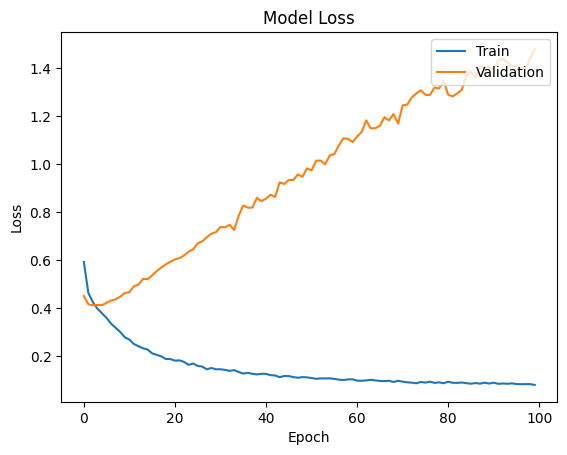

100/100 [==============================] - 0s 2ms/step


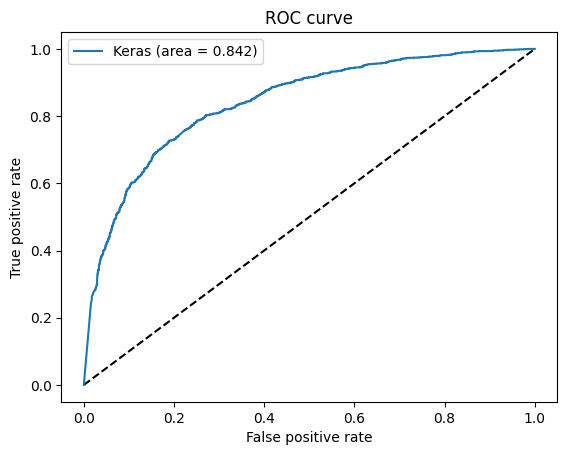

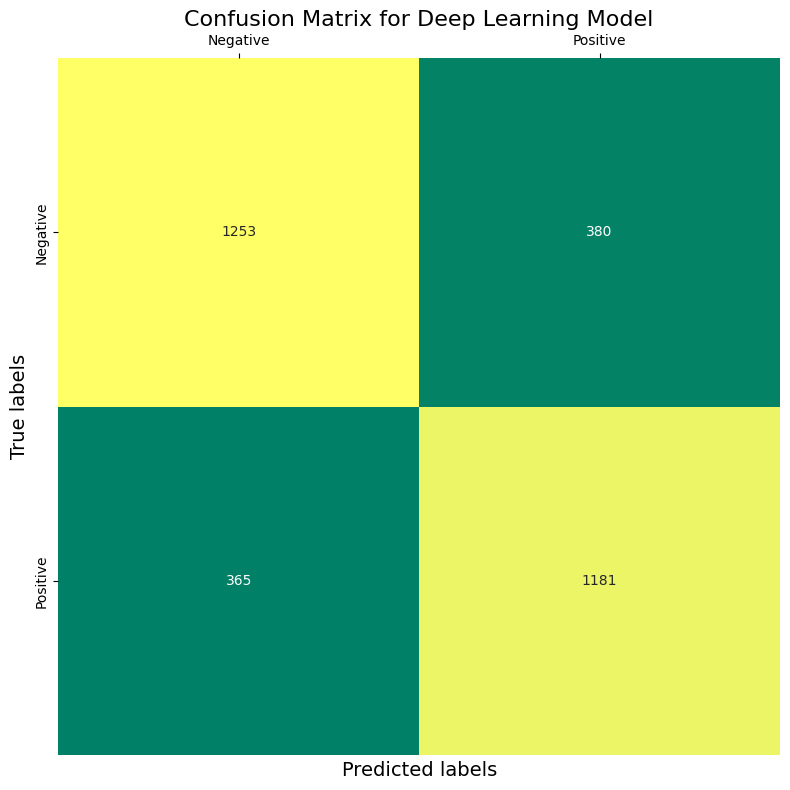

In [18]:
##Modello Deep Learning per la classificazione binaria del Sentiment
# Approccio TF-IDF

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Convert pandas DataFrame/Series to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Definizione del modello
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compila il modello
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Addestramento del modello
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64)

# Valutazione del modello
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Deep Learning Model Accuracy: {accuracy}')

# Visualizzazione della Loss durante l'allenamento
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predizioni per la ROC Curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

# Calcolo dell'area sotto la curva ROC
auc_keras = auc(fpr_keras, tpr_keras)

# Visualizzazione della ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Calcolo della matrice di confusione
y_pred_binary = (y_pred_keras > 0.5).astype('int32')
cm = confusion_matrix(y_test, y_pred_binary)

# Parametri per la visualizzazione
fig, ax = plt.subplots(figsize=(8, 8))  # Dimensione del grafico
cmap = sns.color_palette("summer", as_cmap=True)  # Mappa di colori

# Creazione della heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, ax=ax)

# Aggiunta di etichette agli assi
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)

# Aggiunta del titolo
ax.set_title('Confusion Matrix for Deep Learning Model', fontsize=16)

# Aggiunta delle etichette dei quadranti
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Allineamento delle labels dei quadranti
ax.xaxis.tick_top()
ax.xaxis.set_label_position('bottom')

# Visualizzazione del grafico della matrice di confusione
plt.tight_layout()
plt.show()

Precision: 0.7565663036515055
Recall: 0.7639068564036222
F1 Score: 0.7602188606372706


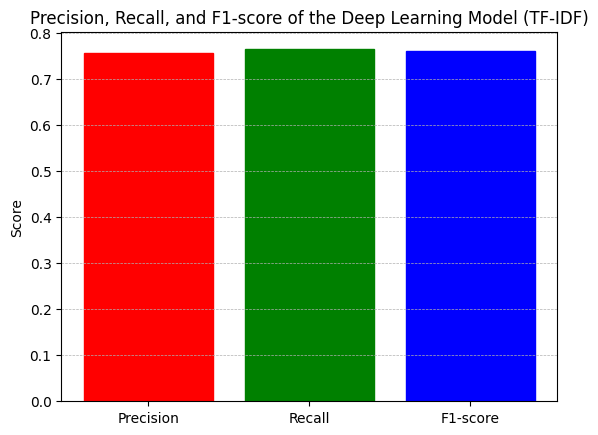

In [19]:
##Bar chart per precision, recall e F1-score per il modello di Deep Learning
# con approccio TF-IDF

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Dove precision, recall, e f1 sono state precedentemente calcolate
metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
names = list(metrics.keys())
values = list(metrics.values())

# Bar chart
fig, ax = plt.subplots()

# Crea barre
barlist = ax.bar(names, values)

# Definisci colore per ogni
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')

# Aggiungi titoti e labels
ax.set_title('Precision, Recall, and F1-score of the Deep Learning Model (TF-IDF)')
ax.set_ylabel('Score')

# Mostra griglia
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Mostra bar chart
plt.show()

**Approccio Word2Vec**

In [20]:
##Funzione di preprocessing Train Set e Test Set per approccio Word2Vec di Deep Learning.
# La funzione è aggiornata per beneficiare del contesto fornito dalla punteggiatura
# e di altri elementi testuali che possono servire per l'approccio Word2Vec.

import re
from html import unescape
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download delle risorse NLTK necessarie
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


def clean_text1(text, language='english'):
    # Decodifica HTML
    text = unescape(text)

    # Rimuovi URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Rimuovi emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Rimuovi numeri (se necessario per il tuo caso d'uso)
    text = re.sub(r'\d+', '', text)

    # Rimuovi caratteri speciali e spazi extra (se necessario per il tuo caso d'uso)
    text = re.sub(r'\s+', ' ', text)  # spazi multipli a spazio singolo
    text = re.sub(r'[^\w\s]', '', text)  # rimuove caratteri speciali, mantenendo solo parole e spazi

    # Normalizzazione del testo: converti tutto in minuscolo
    text = text.lower()

    # Tokenizzazione utilizzando solo parole (rimuove la punteggiatura se necessario)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Rimuovi le stopwords
    stop_words = set(stopwords.words(language))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatizzazione
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Riunisci i token puliti in una stringa
    cleaned_text1 = ' '.join(tokens)

    return cleaned_text1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Epoch 1/10
1046/1046 [==============================] - 75s 67ms/step - loss: 0.5995 - accuracy: 0.6677 - val_loss: 0.5913 - val_accuracy: 0.6684
Epoch 2/10
1046/1046 [==============================] - 72s 68ms/step - loss: 0.5499 - accuracy: 0.7137 - val_loss: 0.5600 - val_accuracy: 0.7090
Epoch 3/10
1046/1046 [==============================] - 77s 74ms/step - loss: 0.5227 - accuracy: 0.7346 - val_loss: 0.5512 - val_accuracy: 0.7156
Epoch 4/10
1046/1046 [==============================] - 81s 77ms/step - loss: 0.5047 - accuracy: 0.7462 - val_loss: 0.5295 - val_accuracy: 0.7320
Epoch 5/10
1046/1046 [==============================] - 69s 66ms/step - loss: 0.4908 - accuracy: 0.7555 - val_loss: 0.5214 - val_accuracy: 0.7332
Epoch 6/10
1046/1046 [==============================] - 71s 68ms/step - loss: 0.4760 - accuracy: 0.7660 - val_loss: 0.5590 - val_accuracy: 0.7075
Epoch 7/10
1046/1046 [==============================] - 68s 65ms/step - loss: 0.4625 - accuracy: 0.7734 - val_loss: 0.5229 -

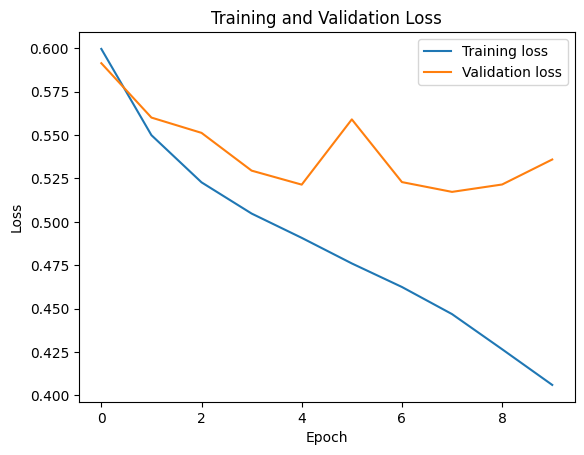

100/100 [==============================] - 4s 34ms/step


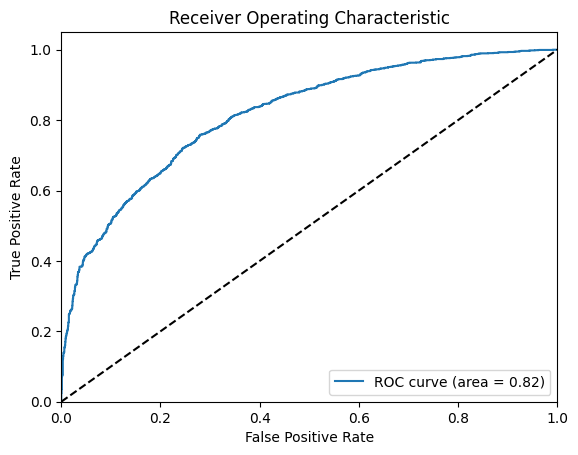

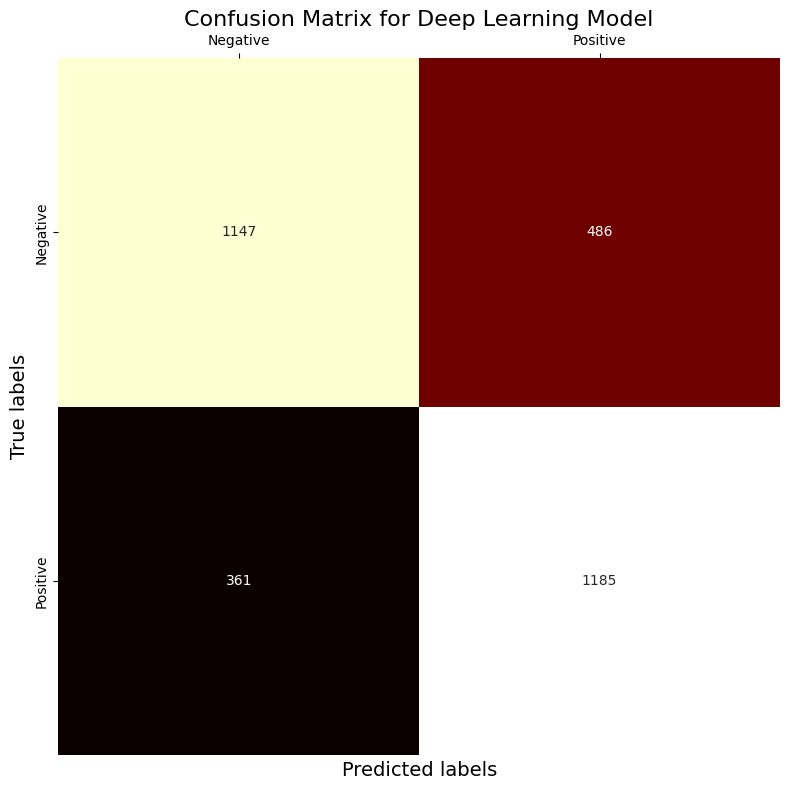

In [24]:
##Modello Deep Learning per la classificazione binaria del Sentiment
# Approccio Word2Vec

import gensim
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Rimuovere le righe con sentiment 'Neutral' dal df_train
df_train = df_train[df_train['Sentiment'] != 'Neutral']

# Rimuovere le righe con sentiment 'Neutral' dal df_test
df_test = df_test[df_test['Sentiment'] != 'Neutral']

# Pulizia del Train Set
df_train['cleaned_text1'] = df_train['OriginalTweet'].apply(lambda x: clean_text1(x))

# Pulizia del Test Set
df_test['cleaned_text1'] = df_test['OriginalTweet'].apply(lambda x: clean_text1(x))

# Tokenizzazione del Train Set
df_train['tokenized_text'] = df_train['cleaned_text1'].apply(lambda x: x.split())

# Tokenizzazione del Test Set
df_test['tokenized_text'] = df_test['cleaned_text1'].apply(lambda x: x.split())

# Addestramento modello word2vec sui tuoi dati
word2vec_model = gensim.models.Word2Vec(df_train['tokenized_text'],
                                        vector_size=100, window=5,
                                        min_count=1, workers=4)

# Converti le parole in token e crea una mappatura indice <-> parola
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['cleaned_text1'])

# Converti i token in sequenze
train_sequences = tokenizer.texts_to_sequences(df_train['cleaned_text1'])
test_sequences = tokenizer.texts_to_sequences(df_test['cleaned_text1'])

# Padding delle sequenze per assicurare che tutti input abbiano la stessa lunghezza
MAX_SEQUENCE_LENGTH = max(len(x) for x in train_sequences) # o scegli un numero fisso
df_train_padded = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
df_test_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Creazione della matrice di embedding iniziale con i vettori word2vec
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Creazione del modello di Deep Learning
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, word2vec_model.vector_size,
                    input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix]
                    , trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Addestrare il modello
history = model.fit(df_train_padded, y_train, batch_size=32, epochs=10, validation_data=(df_test_padded, y_test))

# Valutare il modello
loss, accuracy = model.evaluate(df_test_padded, y_test)
print(f'Test accuracy: {accuracy}')

# Visualizzare la loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Prevedere le probabilità per il test set
y_pred_probs = model.predict(df_test_padded)

# Calcolare i tassi di vero positivo e falso positivo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calcolare l'area sotto la curva ROC
roc_auc = auc(fpr, tpr)

# Graficare la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Grafico della diagonale 45 gradi (no-skill classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calcolo della matrice di confusione
y_pred_binary = (y_pred_probs > 0.5).astype('int32')
cm = confusion_matrix(y_test, y_pred_binary)

# Parametri per la visualizzazione
fig, ax = plt.subplots(figsize=(8, 8))  # Dimensione del grafico
cmap = sns.color_palette("hot", as_cmap=True)  # Mappa di colori

# Creazione della heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, ax=ax)

# Aggiunta di etichette agli assi
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)

# Aggiunta del titolo
ax.set_title('Confusion Matrix for Deep Learning Model', fontsize=16)

# Aggiunta delle etichette dei quadranti
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Allineamento delle labels dei quadranti
ax.xaxis.tick_top()
ax.xaxis.set_label_position('bottom')

# Visualizzazione del grafico della matrice di confusione
plt.tight_layout()
plt.show()

Precision: 0.7091561938958707
Recall: 0.7664941785252264
F1 Score: 0.7367112216350638


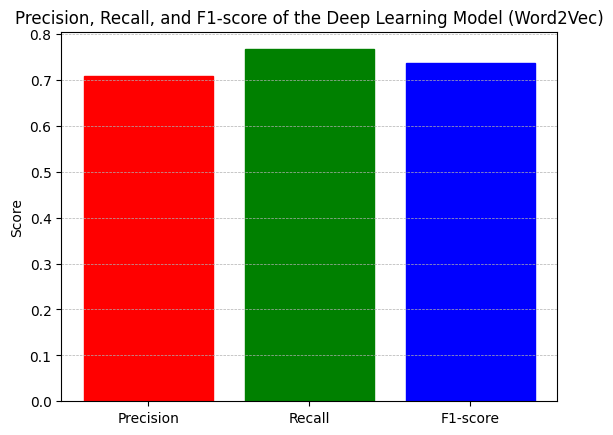

In [25]:
##Bar chart per precision, recall e F1-score per il modello di Deep Learning
# con approccio Word2Vec

import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Definire la serie di previsioni binarie basate sulle probabilità predette
y_pred_binary = (y_pred_probs > 0.5).astype("int32")

# Calcola Precision, Recall, e F1 Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
names = list(metrics.keys())
values = list(metrics.values())

# Bar chart
fig, ax = plt.subplots()

# Crea barre
barlist = ax.bar(names, values)

# Definisci colore per ogni barra
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')

# Aggiungi titoli e labels
ax.set_title('Precision, Recall, and F1-score of the Deep Learning Model (Word2Vec)')
ax.set_ylabel('Score')

# Mostra griglia
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Mostra bar chart
plt.show()

In [23]:
duration = timedelta(seconds=time.perf_counter()-starttime)
print('Tempo di esecuzione dell\'intero codice: ', duration)

Tempo di esecuzione dell'intero codice:  0:18:59.672354
